In [1]:
#What kind of cleaning steps did you perform?
# identify and substitde all null value using 
#How did you deal with missing values, if any?
#-if they are numbers or 
#Were there outliers, and how did you handle them?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

In [3]:
test = pd.read_csv('test_users.csv')
train = pd.read_csv('train_users_2.csv')

In [4]:
test['gender'] = test['gender'].replace('-unknown-', np.nan)

In [5]:
test['gender'].astype(str)

0        FEMALE
1           nan
2           nan
3           nan
4           nan
5        FEMALE
6          MALE
7           nan
8           nan
9           nan
10          nan
11       FEMALE
12         MALE
13          nan
14          nan
15       FEMALE
16          nan
17          nan
18       FEMALE
19         MALE
20       FEMALE
21          nan
22         MALE
23          nan
24          nan
25         MALE
26       FEMALE
27          nan
28          nan
29          nan
          ...  
62066       nan
62067    FEMALE
62068       nan
62069    FEMALE
62070    FEMALE
62071       nan
62072       nan
62073       nan
62074       nan
62075    FEMALE
62076      MALE
62077       nan
62078       nan
62079      MALE
62080       nan
62081    FEMALE
62082       nan
62083      MALE
62084      MALE
62085    FEMALE
62086       nan
62087      MALE
62088       nan
62089      MALE
62090       nan
62091       nan
62092       nan
62093       nan
62094       nan
62095    FEMALE
Name: gender, Length: 62

In [6]:
test = test.dropna(axis=1, how='all')

In [7]:
test.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [8]:
testclean = test.dropna().reset_index()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [10]:
train['gender'] = train['gender'].astype(str)

In [11]:
train['gender'] = train['gender'].replace('-unknown-', np.nan)

In [12]:
train.head(20)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,NaN,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,NaN,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [13]:
cleantrain = train.dropna().reset_index()

In [14]:
cleantrain.head()

,index,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
1,3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
2,6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
3,7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
4,8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US


In [15]:
df = pd.concat((testclean, cleantrain), axis=0, ignore_index=True, sort=False)

In [16]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [17]:
df.loc[df.age > 95, 'age'] = np.nan
df.loc[df.age < 18, 'age'] = np.nan

In [18]:
df['gender'].unique()

array(['FEMALE', 'MALE', 'OTHER'], dtype=object)

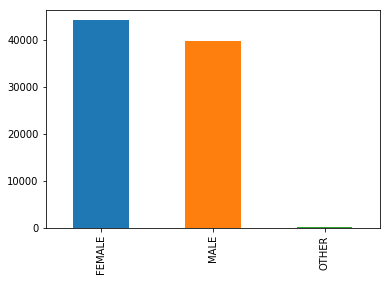

In [19]:
df['gender'].value_counts().plot(kind='bar')
# There is trend that female is more likely to register than male. However, there is significant amount of male also registered 

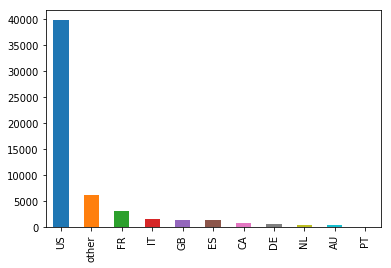

In [20]:
df['country_destination'].value_counts().plot(kind='bar')
# The 1st country destination is US. 2nd is other and 3rd is France. 

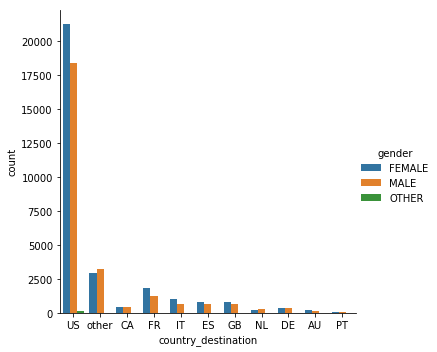

In [21]:
sns.catplot('country_destination', hue='gender', kind='count', data=df)
# In most of the countries female are more likely to register. 
# however, in other countries, male are more likely choose as destination.
# Therefore, there might be relationship between gender and destination selection. 

/Users/irene/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


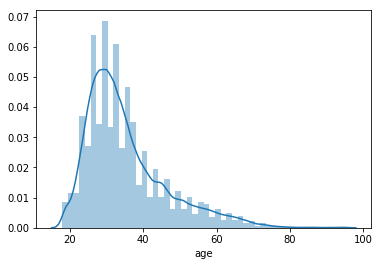

In [22]:
sns.distplot(df.age.dropna())
# According to this bar plot, between age 25 to 40 has highest number of the people use airbnb.

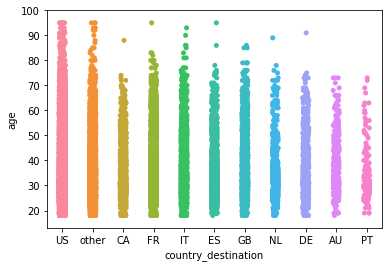

In [23]:
sns.stripplot(x='country_destination', y='age', data=df, jitter=True)
# In US, most of the age range have used Airbnb. However, other countries and other destination is less likely to chosen by age above 70s and 80s
#since age is not constant in selecting destination, there might be relationship between age and destination.

In [25]:
df.signup_method.unique()

array(['facebook', 'basic', 'google', 'weibo'], dtype=object)

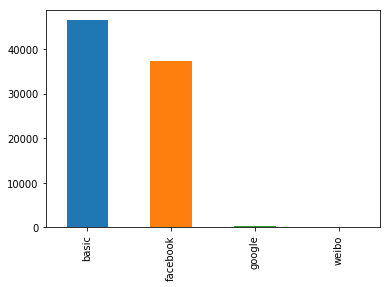

In [26]:
df['signup_method'].value_counts().plot(kind='bar')
# facebook and basic method is most popular method of signup 

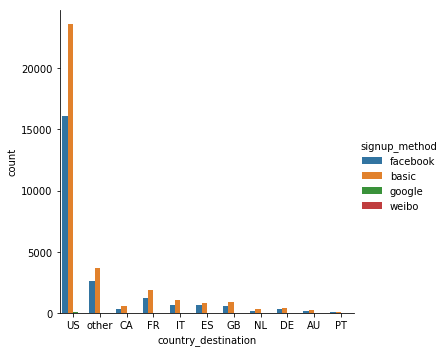

In [27]:
sns.catplot('country_destination', hue='signup_method', kind='count', data=df)

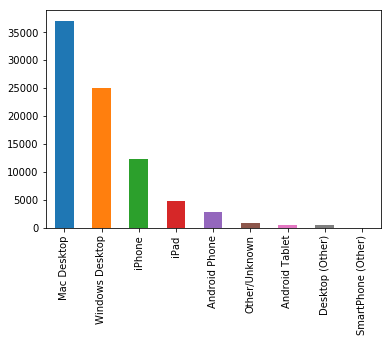

In [26]:
df['first_device_type'].value_counts().plot(kind='bar')
# Most of the users used desktop to register. Among the desktop, I can tell the Mac desktop is more likely to be used than Window desktop. 


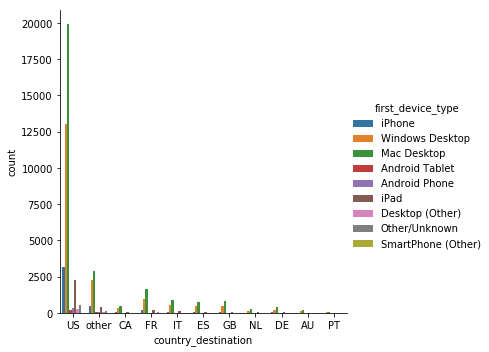

In [28]:
sns.catplot('country_destination', hue='first_device_type', kind='count', data=df)

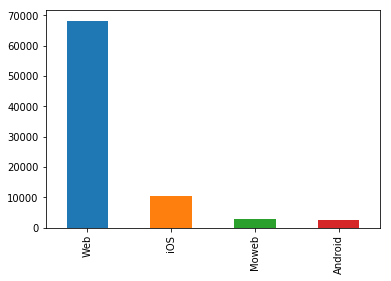

In [27]:
df['signup_app'].value_counts().plot(kind='bar')

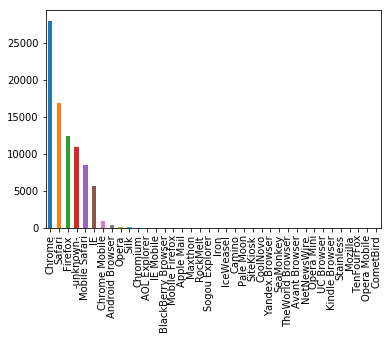

In [28]:
df['first_browser'].value_counts().plot(kind='bar')
# Among the lot of the browsers, chrome 

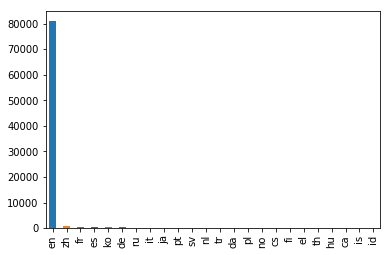

In [29]:
df['language'].value_counts().plot(kind='bar')
# Since the data is collected in US, the language used is english and it seems 

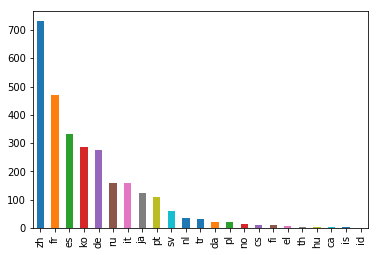

In [30]:
lan = df['language'].replace('en', np.nan)
lan.dropna()
lan.value_counts().plot(kind='bar')

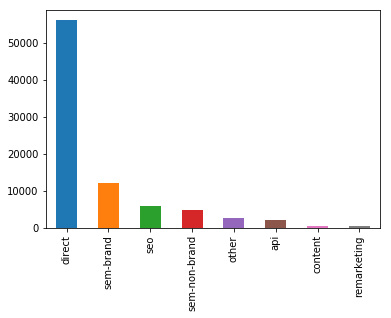

In [30]:
df['affiliate_channel'].value_counts().plot(kind='bar')

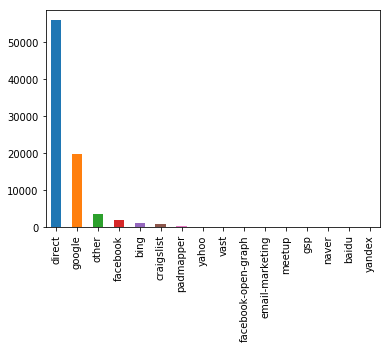

In [31]:
df['affiliate_provider'].value_counts().plot(kind='bar')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84007 entries, 0 to 84006
Data columns (total 17 columns):
index                      84007 non-null int64
id                         84007 non-null object
date_account_created       84007 non-null datetime64[ns]
timestamp_first_active     84007 non-null int64
gender                     84007 non-null object
age                        82897 non-null float64
signup_method              84007 non-null object
signup_flow                84007 non-null int64
language                   84007 non-null object
affiliate_channel          84007 non-null object
affiliate_provider         84007 non-null object
first_affiliate_tracked    84007 non-null object
signup_app                 84007 non-null object
first_device_type          84007 non-null object
first_browser              84007 non-null object
date_first_booking         56192 non-null object
country_destination        56192 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), obj

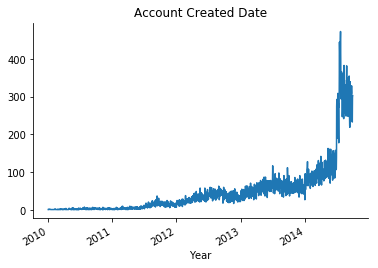

In [41]:
df['date_account_created'] = pd.to_datetime(df['date_account_created'])
df['date_account_created'].value_counts().plot()
plt.xlabel('Year')
plt.title('Account Created Date')
sns.despine()
# There are increase trend of creating the account as time goes and there was great increase in 2014 

In [25]:
age = pd.read_csv('age_gender_bkts.csv')

In [33]:
age.groupby(age['country_destination'])

In [35]:
age = age.set_index(['country_destination'])

In [36]:
age.head()

,age_bucket,gender,population_in_thousands,year
country_destination,,,,
AU,100+,male,1.0,2015.0
AU,95-99,male,9.0,2015.0
AU,90-94,male,47.0,2015.0
AU,85-89,male,118.0,2015.0
AU,80-84,male,199.0,2015.0


In [56]:
session = pd.read_csv('sessions.csv')

In [57]:
session.head(10)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


In [59]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
user_id          object
action           object
action_type      object
action_detail    object
device_type      object
secs_elapsed     float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [77]:
session.action_detail.unique()

array([nan, 'view_search_results', 'wishlist_content_update',
       'similar_listings', 'change_trip_characteristics', 'p3',
       'header_userpic', 'contact_host', 'message_post', 'dashboard',
       'create_user', 'confirm_email_link', 'user_profile_content_update',
       'user_profile', 'pending', 'p5', 'create_phone_numbers',
       'cancellation_policies', 'user_wishlists',
       'change_contact_host_dates', 'wishlist', 'message_thread',
       'request_new_confirm_email', 'send_message', 'your_trips',
       'login_page', 'login', 'login_modal', 'toggle_archived_thread',
       'p1', 'profile_verifications', 'edit_profile', 'oauth_login',
       'post_checkout_action', 'account_notification_settings',
       'update_user_profile', 'oauth_response', 'signup_modal',
       'signup_login_page', 'at_checkpoint', 'manage_listing',
       'create_listing', 'your_listings', 'profile_references',
       'list_your_space', 'popular_wishlists', 'listing_reviews_page',
       'apply_cou

In [68]:
session['action'] = session['action'].replace('-unknown-', np.nan)
session['action_type'] = session['action_type'].replace('-unknown-', np.nan)
session['action_detail'] = session['action_detail'].replace('-unknown-', np.nan)
session['device_type'] = session['device_type'].replace('-unknown-', np.nan)

In [69]:
session.dropna()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
10,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,59274.0
12,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,1399.0
13,d1mm9tcy42,index,view,view_search_results,Windows Desktop,74886.0
14,d1mm9tcy42,similar_listings,data,similar_listings,Windows Desktop,255.0
15,d1mm9tcy42,ajax_refresh_subtotal,click,change_trip_characteristics,Windows Desktop,8134.0


In [78]:
session.loc[(session['action_detail'] == 'complete_booking')]

,user_id,action,action_type,action_detail,device_type,secs_elapsed
1319663,jzdix1ilgd,click,click,complete_booking,iPhone,934205.0
1332250,7vxv10hv5z,click,click,complete_booking,iPhone,97459.0
1415624,853xrxhajm,click,click,complete_booking,iPhone,32874.0
1415811,853xrxhajm,click,click,complete_booking,iPhone,37465.0
1454021,i35xbvtu4s,click,click,complete_booking,iPhone,1.0
1454225,i35xbvtu4s,click,click,complete_booking,iPhone,14116.0
1549732,j6fw0jxg47,click,click,complete_booking,iPhone,627249.0
1588968,99jtu8071w,click,click,complete_booking,iPhone,57144.0
1588990,99jtu8071w,click,click,complete_booking,iPhone,7133.0
1771705,6kyxp4jx74,click,click,complete_booking,iPhone,0.0
